In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
a=0
b=1.6
A=-2
B=3

bb=1
mu=0.8
dx=0.1
dt=(1/bb)*(2*mu*dx**2)
Nx=int((B-A)/dx) ## intervals in space
Nt=int((b-a)/dt)## intervals in time

In [94]:
x=np.linspace(A,B,Nx+1)## discretize space domain
t=np.linspace(a,b,Nt+1) ## discretize time domain

In [95]:
U0=np.where(abs(x)<=0.5,0.5*(1-x**2),0)


In [96]:
U=np.zeros((Nx+1,Nt+1))
U[:,0]=U0

In [97]:
for n in range (1,Nt+1):
    for j in range(Nx+1):
        if j==0 :
            U[j,n]=0
        elif j==Nx:
            U[j,n]=U[j-1,n]
            
        else:
            U[j,n]=(mu-0.5)*(U[j-1,n-1]+U[j+1,n-1])
    

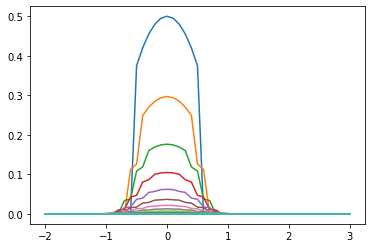

In [98]:
for i in range(Nt+1):
    plt.plot(x,U[:,i])

In [99]:
A1=(1+2*mu)*np.ones(Nx-1)
A2=(-mu)*np.ones(Nx-2)

A=np.diag(A1)+ np.diag(A2,1)+ np.diag(A2,-1)


In [100]:
A

array([[ 2.6, -0.8,  0. , ...,  0. ,  0. ,  0. ],
       [-0.8,  2.6, -0.8, ...,  0. ,  0. ,  0. ],
       [ 0. , -0.8,  2.6, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  2.6, -0.8,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.8,  2.6, -0.8],
       [ 0. ,  0. ,  0. , ...,  0. , -0.8,  2.6]])

In [101]:
F=U0[1:Nx-1]

In [102]:
Uu=np.zeros((Nx+1,Nt+1))
Uee=np.zeros(Nx+1)
Uu[:,0]=U0
for i in range (1,Nt+1):
    U0=Uu[:,i-1]
    Ue=np.linalg.inv(A)@U0[1:Nx]
    Uee[1:Nx]=Ue
    Uu[:,i]=Uee
 

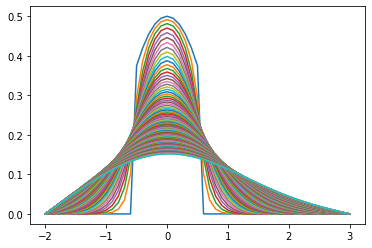

In [103]:
for i in range(Nt+1):
    plt.plot(x,Uu[:,i])